## Importing all the necessary libraries to get started with the Data Wrangling and Analysis Part

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cepheus-23-data-science-hackathon-ps-ii/Sample Submission.csv
/kaggle/input/cepheus-23-data-science-hackathon-ps-ii/Train.csv
/kaggle/input/cepheus-23-data-science-hackathon-ps-ii/Test.csv


In [ ]:
train_path = '/kaggle/input/cepheus-23-data-science-hackathon-ps-ii/Train.csv'
test_path = '/kaggle/input/cepheus-23-data-science-hackathon-ps-ii/Test.csv'
sub_path = '/kaggle/input/cepheus-23-data-science-hackathon-ps-ii/Sample Submission.csv'

In [ ]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
df_sub = pd.read_csv(sub_path)

In [ ]:
### Dropping ID columns from both train and test set as they have no value for modelling

df_train = df_train.drop(['Unnamed: 0','ID','Name'],axis=1)
df_test = df_test.drop(['Unnamed: 0','ID','Name'],axis=1)

In [ ]:
df_train.sample(10)

,H,Diameter,Eccentricity (e),Semi-major axis,Inclination,om,w,Mean Anomaly,Aphelion distance,Mean distance,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms,Hazard_rate
377070,15.200000,50.328436,0.108535,3.093106,18.007653,145.047499,236.098714,222.923373,3.428817,0.181181,...,0.000006,0.000019,0.000033,0.000031,3.977400e-08,3.152500e-09,0.000181,0.000035,0.621450,8.551449e-01
145176,19.000000,75.410545,0.131427,2.162361,3.979177,117.479943,275.524761,308.272664,2.446554,0.309964,...,0.000053,0.000268,0.005465,0.003753,2.552000e-06,4.850000e-07,0.011965,0.001817,0.493500,4.703063e+00
607130,26.495500,105.160004,0.240749,1.316522,6.237060,165.395302,312.574786,26.593008,1.639890,0.659089,...,0.015807,0.002821,0.091092,0.123576,1.540313e-03,9.040940e-04,0.101082,0.776864,0.507554,2.801565e-02
330664,20.501247,81.368959,0.676407,2.749974,22.830493,328.875124,17.542774,221.023481,4.608516,0.216173,...,0.006379,0.010710,0.014335,0.516477,7.257460e-03,5.092980e-04,3.862425,3.870845,0.275909,4.379011e+00
481127,24.046577,95.440288,0.124368,1.242017,7.644215,119.111551,289.458683,125.169538,1.396467,0.712078,...,0.008961,0.001221,0.014208,0.395944,3.448887e-04,2.625939e-04,0.492784,0.187835,0.381211,1.184787e+00
415681,20.031000,69.502559,0.351806,2.609546,6.794649,92.704259,254.112536,358.017837,3.527601,0.233807,...,0.000786,0.005102,0.013942,0.265940,4.405300e-04,4.379700e-05,1.139000,0.288420,0.205690,8.146003e-02
824036,20.672000,72.046672,0.318285,2.015413,15.068610,4.749391,335.099315,13.494439,2.656888,0.344475,...,0.771690,0.062647,0.483610,0.468090,1.121200e-01,2.180600e-02,1.125300,66.154000,0.365040,2.241682e-06
574229,17.732299,60.379070,0.607183,1.305743,39.716294,19.935939,265.651948,116.806017,2.098070,0.660699,...,0.000019,0.000026,0.000026,0.000055,3.033947e-08,1.429846e-08,0.000080,0.000012,0.450457,2.801565e-02
764255,24.534762,97.377881,0.245611,0.845039,7.188853,240.839295,344.670138,359.345524,1.052994,1.270070,...,0.000141,0.000349,0.000323,0.036593,1.990735e-05,3.819398e-05,0.028072,0.008080,0.395150,2.801565e-02
585372,15.400000,51.122231,0.190561,2.395271,2.459670,18.025250,49.991705,65.811840,2.851718,0.265872,...,0.000004,0.000079,0.000080,0.000010,9.976200e-09,1.395100e-09,0.000037,0.000007,0.524330,1.836190e-10


In [ ]:
print(df_train.shape)

(955878, 27)


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955878 entries, 0 to 955877
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   H                  955878 non-null  float64
 1   Diameter           954924 non-null  float64
 2   Eccentricity (e)   955878 non-null  float64
 3   Semi-major axis    955878 non-null  float64
 4   Inclination        955878 non-null  float64
 5   om                 954924 non-null  float64
 6   w                  954924 non-null  float64
 7   Mean Anomaly       955878 non-null  float64
 8   Aphelion distance  954924 non-null  float64
 9   Mean distance      955878 non-null  float64
 10  tp_r               954924 non-null  float64
 11  tp                 955878 non-null  float64
 12  tp_cal             955878 non-null  float64
 13  per                955878 non-null  float64
 14  sigma_e            955878 non-null  float64
 15  sigma_a            954924 non-null  float64
 16  si

<AxesSubplot:xlabel='Hazard_rate', ylabel='Density'>

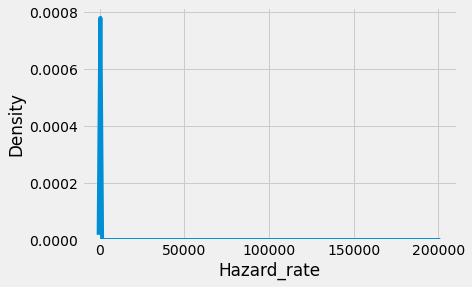

In [ ]:
sns.kdeplot(df_train['Hazard_rate'])

In [ ]:
df_test.sample(10)

,H,Diameter,Eccentricity (e),Semi-major axis,Inclination,om,w,Mean Anomaly,Aphelion distance,Mean distance,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
384368,17.200000,58.266388,0.065453,2.395835,2.153518,291.055255,8.159110,291.734049,2.552650,0.265778,...,1.083300e-07,0.000004,0.000129,0.000136,0.000039,1.983300e-08,3.097500e-09,0.000147,0.000016,0.652910
394755,26.361932,104.629875,0.611891,1.465004,12.372241,28.251874,278.291518,330.848304,2.360015,0.555919,...,3.982806e-04,0.024096,0.000488,0.009105,0.114038,4.749923e-03,1.679346e-03,0.046761,1.957301,0.464743
31436,23.533248,93.402897,0.325796,1.471237,16.101243,92.607679,227.090087,163.760289,1.950461,0.553906,...,1.549239e-05,0.009717,0.000569,0.006474,0.099674,7.718145e-04,3.501380e-04,0.010430,0.381406,0.547385
254983,16.600000,55.885002,0.198282,2.420269,0.603498,203.006157,129.545831,164.137590,2.900164,0.261763,...,1.216700e-07,0.000004,0.000510,0.000511,0.000011,1.287100e-08,1.742600e-09,0.000042,0.000009,0.577280
174612,21.100000,83.745394,0.641880,2.343449,5.776528,122.495275,219.699049,12.966929,3.847662,0.274739,...,8.444100e-06,0.000185,0.000506,0.000542,0.043006,2.949300e-04,3.158900e-05,0.151110,0.150660,0.672320
47765,0.254373,100.960022,0.458325,1.417854,6.474177,104.346493,283.771265,38.421330,2.067570,0.583822,...,5.863987e-03,0.109767,0.209495,0.316704,0.945204,2.230829e-02,9.454853e-03,0.521781,9.945136,0.599544
320261,24.600000,97.636810,0.253414,1.289060,23.458636,24.348426,62.846547,318.410943,1.618830,0.675922,...,3.378528e-04,0.098135,0.007969,0.212018,0.286704,3.410817e-03,2.332839e-03,0.209968,1.712060,0.364692
388120,16.900000,57.075695,0.075026,2.666179,10.286561,313.433403,276.359920,265.860124,2.866210,0.226397,...,2.227200e-07,0.000017,0.000039,0.000126,0.000124,7.546000e-08,8.940700e-09,0.000555,0.000063,0.642760
232147,16.300000,54.694309,0.174412,2.381554,4.682234,100.252180,253.432022,78.930958,2.796926,0.268172,...,9.161500e-08,0.000004,0.000054,0.000056,0.000012,1.379000e-08,1.983300e-09,0.000044,0.000010,0.563090
316236,17.000000,67.472593,0.192268,3.055955,4.343396,324.262839,230.992158,272.772972,3.643517,0.184495,...,5.585000e-07,0.000016,0.000163,0.000203,0.000077,7.096100e-08,5.389800e-09,0.000410,0.000057,0.571480


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409254 entries, 0 to 409253
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   H                  409254 non-null  float64
 1   Diameter           409254 non-null  float64
 2   Eccentricity (e)   409254 non-null  float64
 3   Semi-major axis    409254 non-null  float64
 4   Inclination        409254 non-null  float64
 5   om                 409254 non-null  float64
 6   w                  409254 non-null  float64
 7   Mean Anomaly       409254 non-null  float64
 8   Aphelion distance  409254 non-null  float64
 9   Mean distance      409254 non-null  float64
 10  tp_r               409254 non-null  float64
 11  tp                 409254 non-null  float64
 12  tp_cal             409254 non-null  float64
 13  per                409254 non-null  float64
 14  sigma_e            409254 non-null  float64
 15  sigma_a            409254 non-null  float64
 16  si

In [ ]:
df_sub

,ID,Hazard_rate
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
409249,409249,0
409250,409250,0
409251,409251,0
409252,409252,0


In [ ]:
target = df_train['Hazard_rate']

In [ ]:
df_combo = pd.concat([df_train.drop('Hazard_rate',axis=1),df_test],ignore_index = False)
df_combo

,H,Diameter,Eccentricity (e),Semi-major axis,Inclination,om,w,Mean Anomaly,Aphelion distance,Mean distance,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
0,16.800000,66.678797,0.126741,2.485660,3.143874,120.677652,117.882909,307.315636,2.800695,0.251502,...,1.300500e-07,0.000007,0.000082,0.000088,0.000033,1.929900e-08,2.599500e-09,0.000133,0.000015,0.574340
1,13.600000,43.978074,0.068699,5.179780,13.167953,47.895421,274.408421,241.068822,5.535625,0.083606,...,5.699200e-07,0.000010,0.000038,0.000137,0.000145,2.785400e-07,6.310200e-09,0.001791,0.000325,0.654830
2,16.200000,54.297412,0.058680,3.160177,10.633791,112.361130,156.006162,68.239275,3.345618,0.175443,...,2.947900e-07,0.000007,0.000048,0.000095,0.000096,1.408800e-07,1.108200e-08,0.000531,0.000130,0.582430
3,18.758000,64.450052,0.190161,2.332643,1.312655,250.220200,140.158954,19.636238,2.776221,0.276651,...,1.604600e-07,0.000010,0.000367,0.000370,0.000040,2.546700e-08,3.806700e-09,0.000145,0.000018,0.457380
4,16.500000,55.488104,0.313855,2.334281,3.649729,220.810491,132.313188,148.784136,3.066906,0.276359,...,1.109500e-07,0.000005,0.000086,0.000087,0.000015,1.674700e-08,2.263600e-09,0.000051,0.000011,0.563560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409249,21.924523,87.017906,0.364233,1.665246,3.971815,119.259026,186.688140,183.256411,2.273087,0.459330,...,4.870728e-06,0.000159,0.000329,0.000674,0.058395,8.444043e-05,2.926091e-05,0.141588,0.044215,0.385573
409250,16.800000,56.678797,0.026793,2.266400,7.147493,101.535015,69.056443,240.438773,2.327122,0.288868,...,1.245900e-07,0.000005,0.000042,0.000114,0.000109,1.695900e-08,3.157700e-09,0.000378,0.000014,0.618160
409251,17.600000,59.853978,0.406114,2.596556,28.040513,55.503278,84.580762,265.798346,3.651055,0.235563,...,5.062800e-07,0.000024,0.000017,0.000057,0.000025,5.809500e-08,5.622300e-09,0.000110,0.000036,0.610790
409252,24.614147,87.692959,0.503174,1.745483,2.890491,23.637347,58.422646,192.087859,2.623247,0.427408,...,8.933048e-05,0.002031,0.000934,0.000445,2.176935,2.194630e-03,5.470303e-04,5.608036,1.084063,0.412293


In [ ]:
df_combo.isnull().sum()

H                      0
Diameter             954
Eccentricity (e)       0
Semi-major axis        0
Inclination            0
om                   954
w                    954
Mean Anomaly           0
Aphelion distance    954
Mean distance          0
tp_r                 954
tp                     0
tp_cal                 0
per                    0
sigma_e                0
sigma_a              954
sigma_q              954
sigma_i                0
sigma_om               0
sigma_w                0
sigma_ma             954
sigma_ad               0
sigma_n                0
sigma_tp               0
sigma_per            954
rms                    0
dtype: int64

### Using Iterative Imputer along with Missing Value Indicator For Columns which have missing Values

In [ ]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import MissingIndicator
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge

##### Most of the times the missing values are not randomly distributed across observations but are distributed within one or more sub-samples. Therefore, missingness itself might be a good indicator to classify the labels

In [ ]:
miss_cols = []
for column in df_combo.select_dtypes('float64').columns.to_list():
    if df_combo[column].isnull().sum() != 0:
        miss_cols.append(column)
        
miss_cols

['Diameter',
 'om',
 'w',
 'Aphelion distance',
 'tp_r',
 'sigma_a',
 'sigma_q',
 'sigma_ma',
 'sigma_per']

In [ ]:
miss_indicator = MissingIndicator()
X_miss = miss_indicator.fit_transform(df_combo[miss_cols])
X_miss.shape

(1365132, 9)

In [ ]:
itr_imputer = IterativeImputer(add_indicator=True ) 
X = itr_imputer.fit_transform(df_combo)
X.shape

(1365132, 35)

In [ ]:
miss_cols_name = ['ind_' + x for x in miss_cols]
miss_cols_name

['ind_Diameter',
 'ind_om',
 'ind_w',
 'ind_Aphelion distance',
 'ind_tp_r',
 'ind_sigma_a',
 'ind_sigma_q',
 'ind_sigma_ma',
 'ind_sigma_per']

In [ ]:
df_combo[miss_cols_name] = X_miss
df_combo

,H,Diameter,Eccentricity (e),Semi-major axis,Inclination,om,w,Mean Anomaly,Aphelion distance,Mean distance,...,rms,ind_Diameter,ind_om,ind_w,ind_Aphelion distance,ind_tp_r,ind_sigma_a,ind_sigma_q,ind_sigma_ma,ind_sigma_per
0,16.800000,66.678797,0.126741,2.485660,3.143874,120.677652,117.882909,307.315636,2.800695,0.251502,...,0.574340,False,False,False,False,False,False,False,False,False
1,13.600000,43.978074,0.068699,5.179780,13.167953,47.895421,274.408421,241.068822,5.535625,0.083606,...,0.654830,False,False,False,False,False,False,False,False,False
2,16.200000,54.297412,0.058680,3.160177,10.633791,112.361130,156.006162,68.239275,3.345618,0.175443,...,0.582430,False,False,False,False,False,False,False,False,False
3,18.758000,64.450052,0.190161,2.332643,1.312655,250.220200,140.158954,19.636238,2.776221,0.276651,...,0.457380,False,False,False,False,False,False,False,False,False
4,16.500000,55.488104,0.313855,2.334281,3.649729,220.810491,132.313188,148.784136,3.066906,0.276359,...,0.563560,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409249,21.924523,87.017906,0.364233,1.665246,3.971815,119.259026,186.688140,183.256411,2.273087,0.459330,...,0.385573,False,False,False,False,False,False,False,False,False
409250,16.800000,56.678797,0.026793,2.266400,7.147493,101.535015,69.056443,240.438773,2.327122,0.288868,...,0.618160,False,False,False,False,False,False,False,False,False
409251,17.600000,59.853978,0.406114,2.596556,28.040513,55.503278,84.580762,265.798346,3.651055,0.235563,...,0.610790,False,False,False,False,False,False,False,False,False
409252,24.614147,87.692959,0.503174,1.745483,2.890491,23.637347,58.422646,192.087859,2.623247,0.427408,...,0.412293,False,False,False,False,False,False,False,False,False


In [ ]:
df_combo.iloc[:,:] = X
df_combo

,H,Diameter,Eccentricity (e),Semi-major axis,Inclination,om,w,Mean Anomaly,Aphelion distance,Mean distance,...,rms,ind_Diameter,ind_om,ind_w,ind_Aphelion distance,ind_tp_r,ind_sigma_a,ind_sigma_q,ind_sigma_ma,ind_sigma_per
0,16.800000,66.678797,0.126741,2.485660,3.143874,120.677652,117.882909,307.315636,2.800695,0.251502,...,0.574340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13.600000,43.978074,0.068699,5.179780,13.167953,47.895421,274.408421,241.068822,5.535625,0.083606,...,0.654830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16.200000,54.297412,0.058680,3.160177,10.633791,112.361130,156.006162,68.239275,3.345618,0.175443,...,0.582430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18.758000,64.450052,0.190161,2.332643,1.312655,250.220200,140.158954,19.636238,2.776221,0.276651,...,0.457380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16.500000,55.488104,0.313855,2.334281,3.649729,220.810491,132.313188,148.784136,3.066906,0.276359,...,0.563560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409249,21.924523,87.017906,0.364233,1.665246,3.971815,119.259026,186.688140,183.256411,2.273087,0.459330,...,0.385573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
409250,16.800000,56.678797,0.026793,2.266400,7.147493,101.535015,69.056443,240.438773,2.327122,0.288868,...,0.618160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
409251,17.600000,59.853978,0.406114,2.596556,28.040513,55.503278,84.580762,265.798346,3.651055,0.235563,...,0.610790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
409252,24.614147,87.692959,0.503174,1.745483,2.890491,23.637347,58.422646,192.087859,2.623247,0.427408,...,0.412293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Looking At the skewness of the Data

In [ ]:
skew_df = df_combo.skew().T 
skew_df 

H                         7.493937
Diameter                 20.852480
Eccentricity (e)          0.611116
Semi-major axis          48.360042
Inclination              47.472523
om                        0.418886
w                         1.289338
Mean Anomaly              0.075549
Aphelion distance        35.656991
Mean distance             1.996167
tp_r                    -10.405538
tp                      -31.388717
tp_cal                  -30.918725
per                      49.200905
sigma_e                  48.921920
sigma_a                  52.417498
sigma_q                 -52.113578
sigma_i                  48.628215
sigma_om                 48.934166
sigma_w                  49.298645
sigma_ma                 49.276004
sigma_ad                 49.197505
sigma_n                  48.595336
sigma_tp                 48.904453
sigma_per                45.737350
rms                      47.949583
ind_Diameter             37.788356
ind_om                   37.788356
ind_w               

### Checking All the KDE Plots

  0%|          | 0/35 [00:00<?, ?it/s]

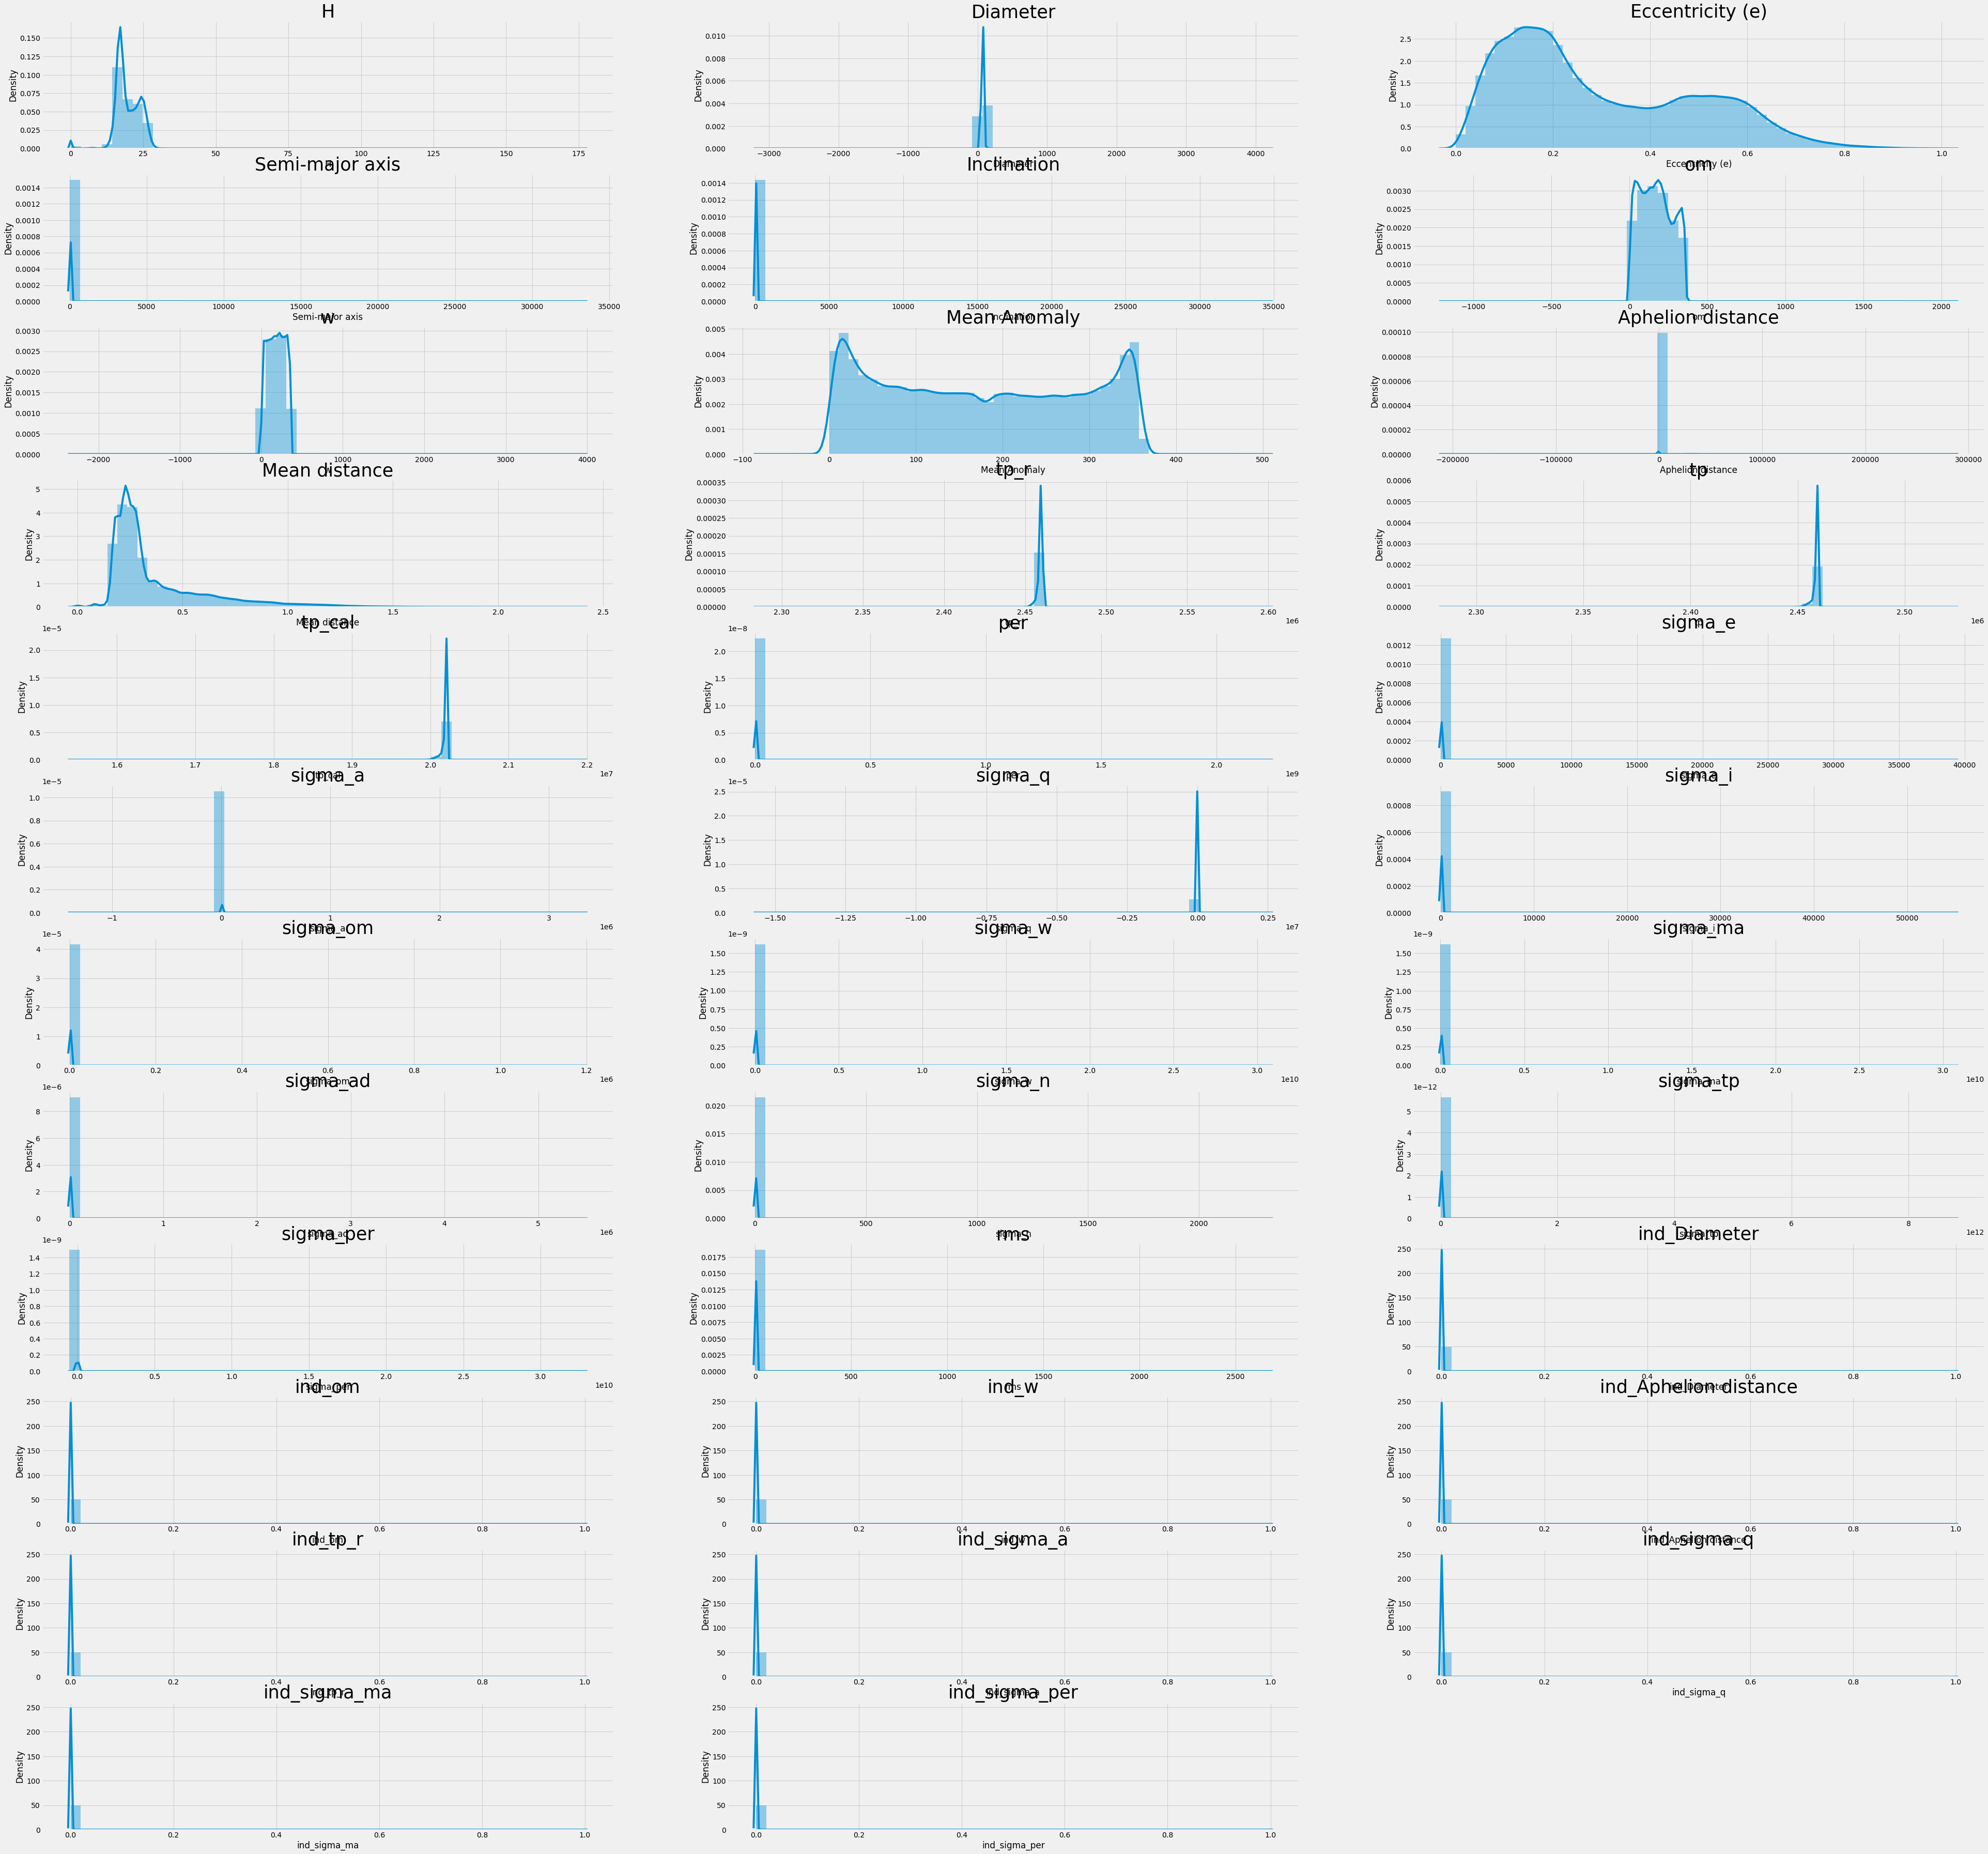

In [ ]:
# looking at kdeplots of columns
plt.figure(figsize=(60,60)) 
for i in tqdm(range(len(df_combo.select_dtypes('float').columns))): 
  plt.subplot(12,3, i+1)
  sns.distplot(df_combo[df_combo.select_dtypes('float').columns[i]])
  plt.title(str(df_combo.select_dtypes('float').columns[i]),fontsize=35)

## Checking All the Box-Plots

  0%|          | 0/35 [00:00<?, ?it/s]

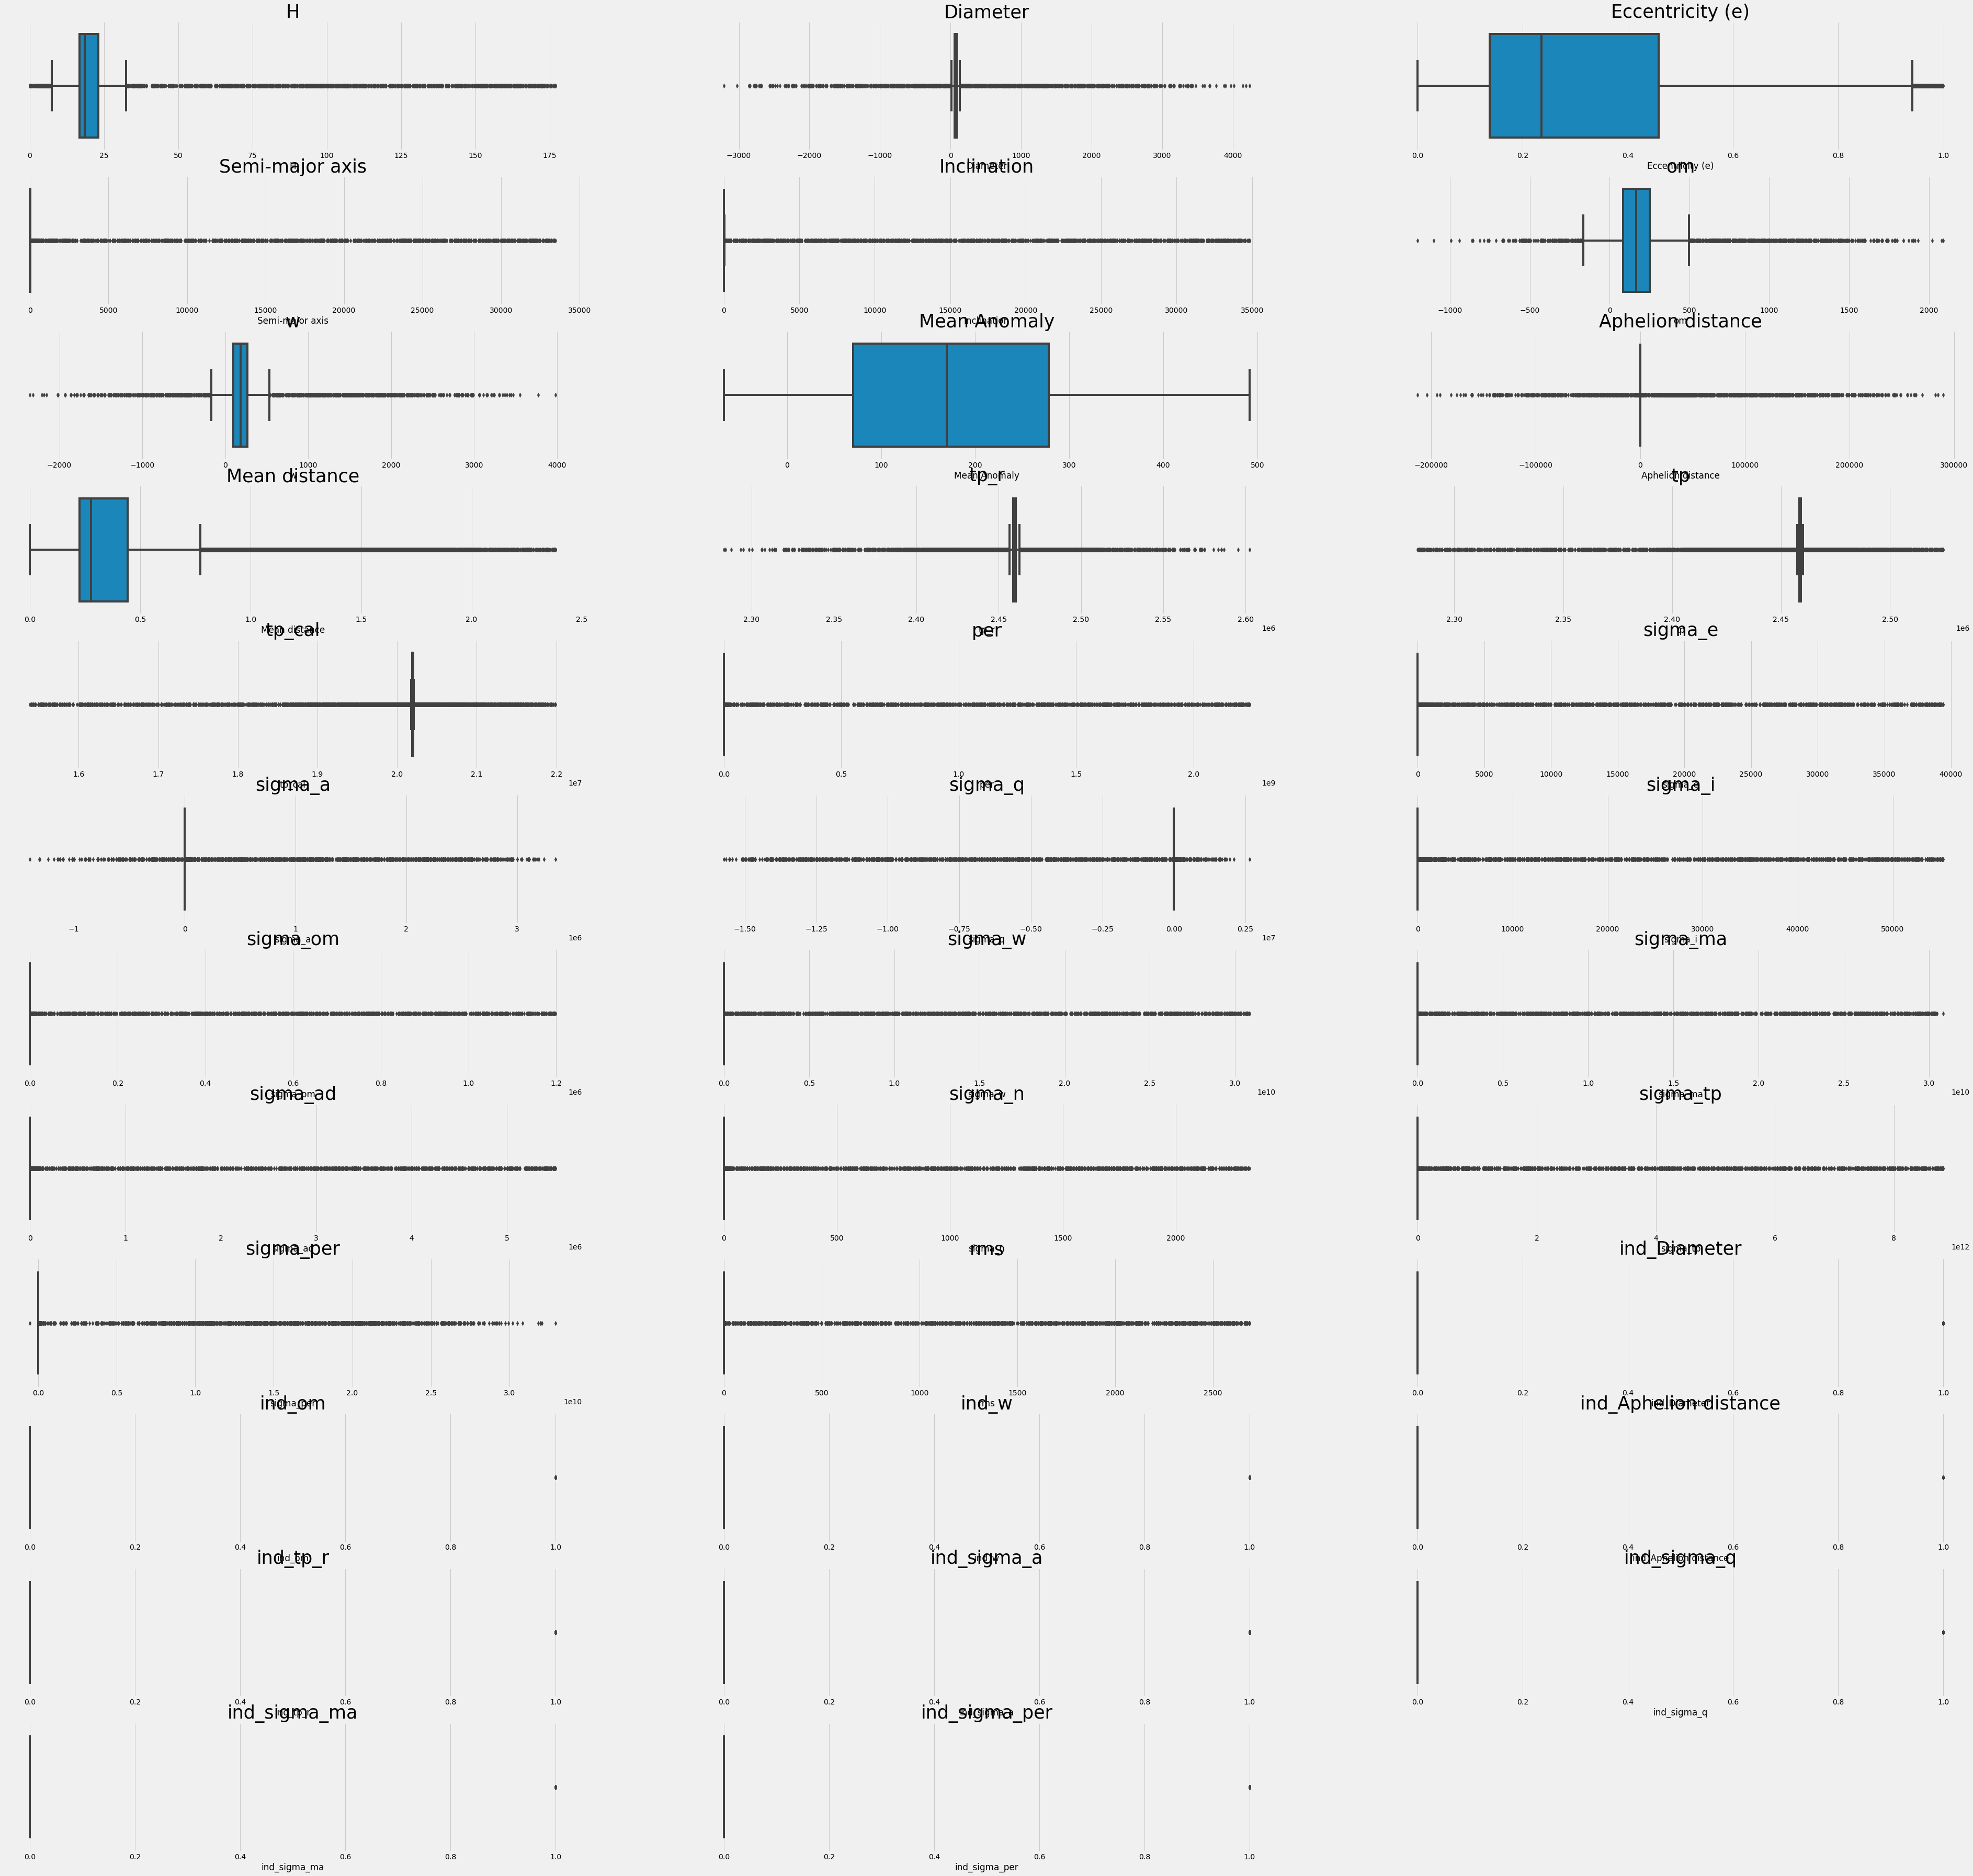

In [ ]:
# looking at boxplots of columns
plt.figure(figsize=(60,60)) 
for i in tqdm(range(len(df_combo.select_dtypes('float').columns))): 
  plt.subplot(12,3, i+1)
  sns.boxplot(df_combo[df_combo.select_dtypes('float').columns[i]])
  plt.title(str(df_combo.select_dtypes('float').columns[i]),fontsize=35)

### Checking the Pearson Correlation

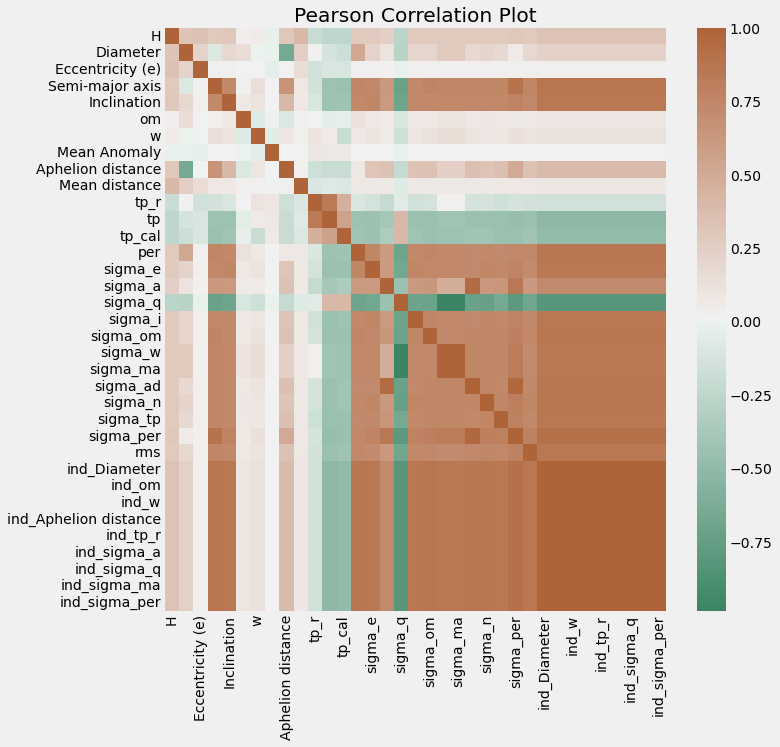

In [ ]:
corr = df_combo.corr(method = 'pearson')
plt.figure(figsize=(10,10))
sns.heatmap(corr , cmap=sns.diverging_palette(150, 30, as_cmap=True))
plt.title('Pearson Correlation Plot')
plt.show()

### Checking the Spearman's Correlation

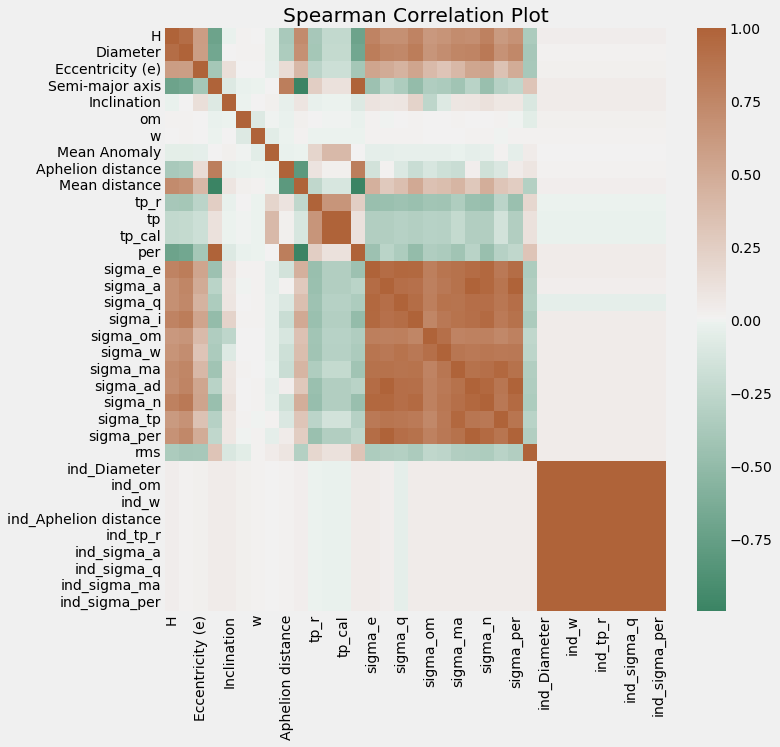

In [ ]:
corr = df_combo.corr(method = 'spearman')
plt.figure(figsize=(10,10))
sns.heatmap(corr , cmap=sns.diverging_palette(150, 30, as_cmap=True))
plt.title('Spearman Correlation Plot')
plt.show()

### Checking the Kendall's Correlation

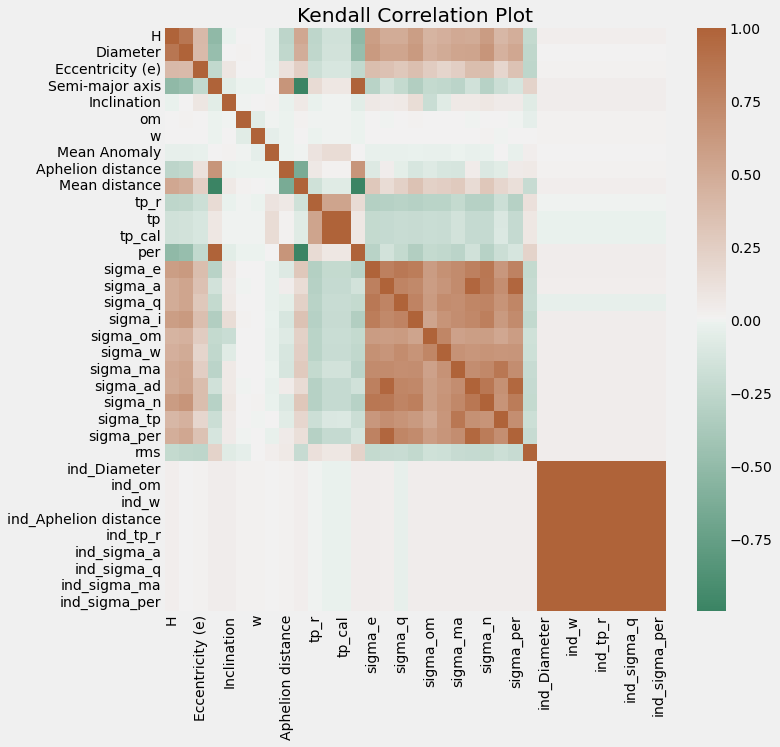

In [ ]:
corr = df_combo.corr(method = 'kendall')
plt.figure(figsize=(10,10))
sns.heatmap(corr , cmap=sns.diverging_palette(150, 30, as_cmap=True))
plt.title('Kendall Correlation Plot')
plt.show()

### From Here on we have applied Quantile Transformer on all columns

In [ ]:
from sklearn.preprocessing import QuantileTransformer

for column in df_combo.select_dtypes('float64').columns.to_list():
    qt = QuantileTransformer(output_distribution = 'normal')
    df_combo[column] = qt.fit_transform(df_combo[column].values.reshape(-1,1))

  0%|          | 0/35 [00:00<?, ?it/s]

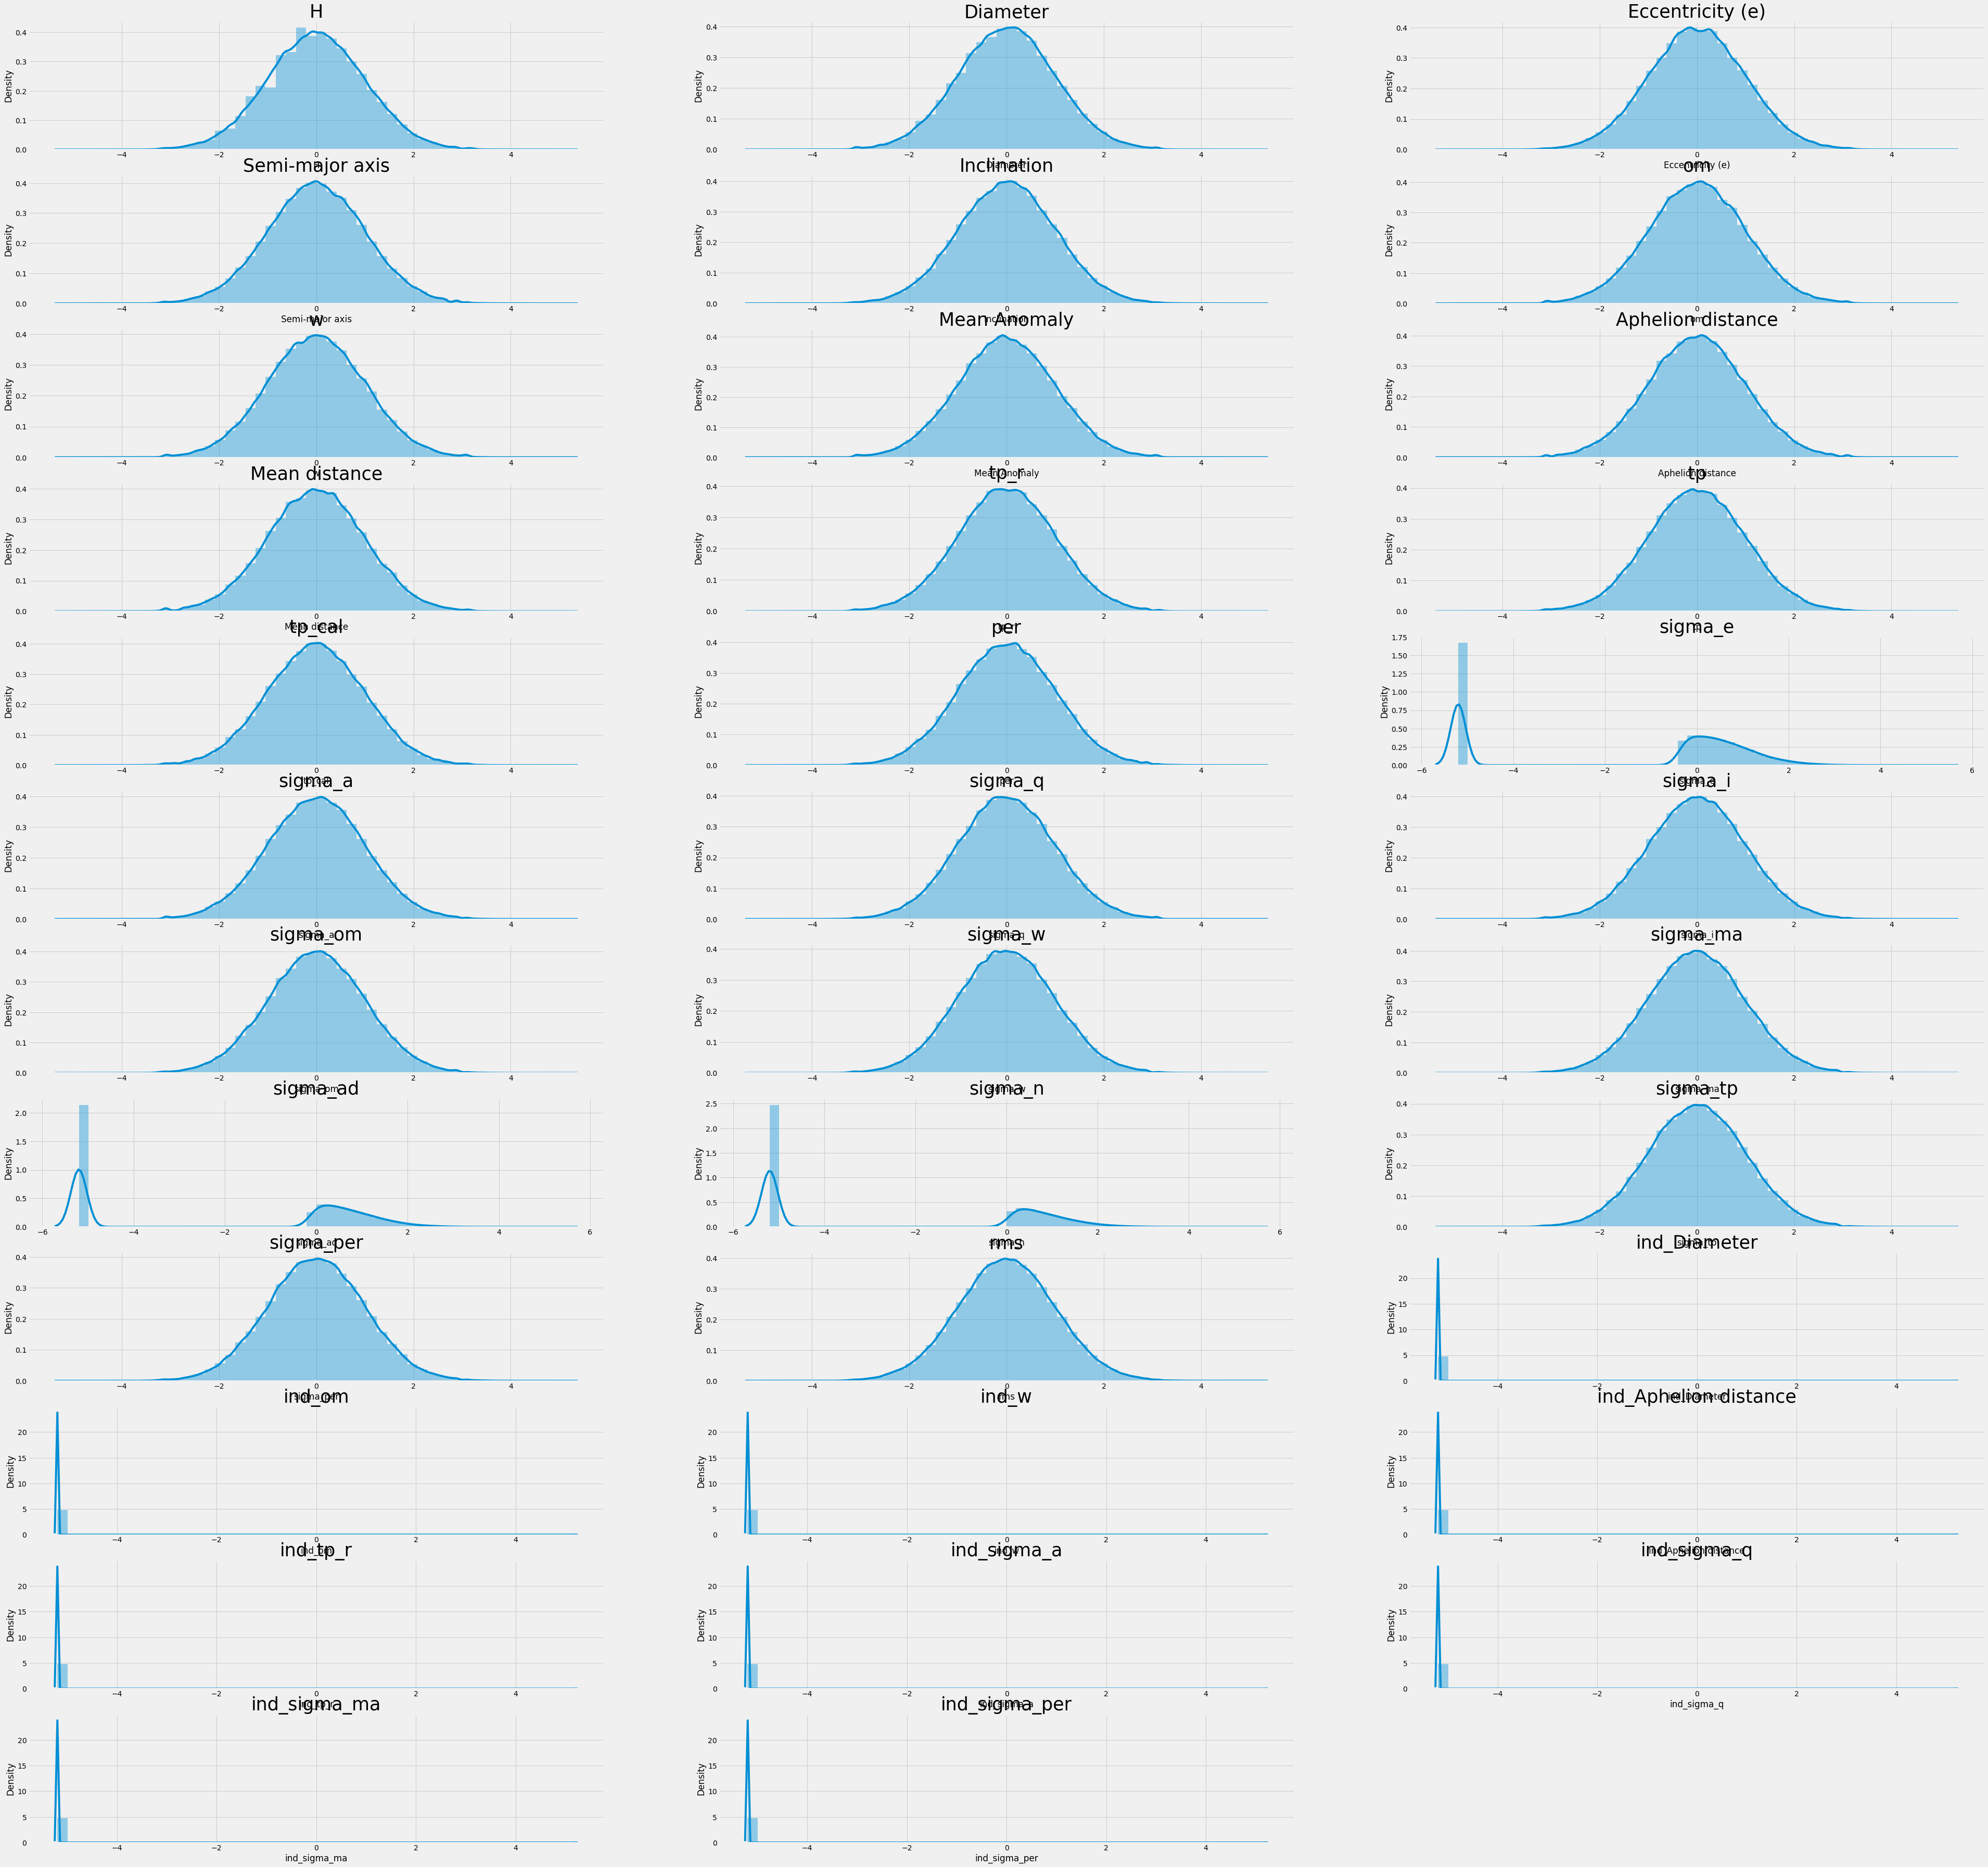

In [ ]:
# looking at kdeplots of columns after transformation
plt.figure(figsize=(60,60)) 
for i in tqdm(range(len(df_combo.select_dtypes('float').columns))): 
  plt.subplot(12,3, i+1)
  sns.distplot(df_combo[df_combo.select_dtypes('float').columns[i]])
  plt.title(str(df_combo.select_dtypes('float').columns[i]),fontsize=35)

### Modelling

In [ ]:
train = df_combo.head(df_train.shape[0])
test = df_combo.tail(df_test.shape[0]).reset_index().drop('index',axis=1)

In [ ]:
X = train
y = target

test = test.values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2084)

## Trying Out Different Models

## XGB

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

xgb = XGBRegressor(n_estimators = 100)
xgb.fit(x_train,y_train)

preds_valid_xgb = xgb.predict(test)

print('Training Score',mean_squared_error(y_train,xgb.predict(x_train),squared=False))
print()
print('Test Score',mean_squared_error(y_test,xgb.predict(x_test),squared=False))

Training Score 65.14057782359038

Test Score 2035.5992690888727


In [ ]:
from xgboost import XGBRFRegressor
xgbrf = XGBRFRegressor()
xgbrf.fit(x_train,y_train,eval_set=[[x_train,y_train],[x_test,y_test]])

preds_valid_xgbrf = xgbrf.predict(test)

print('Training Score',mean_squared_error(y_train,xgbrf.predict(x_train),squared=False))
print()
print('Test Score',mean_squared_error(y_test,xgbrf.predict(x_test),squared=False))

[0]	validation_0-rmse:1595.12913	validation_1-rmse:1896.35756
Training Score 1595.129123525982

Test Score 1896.3575635534746


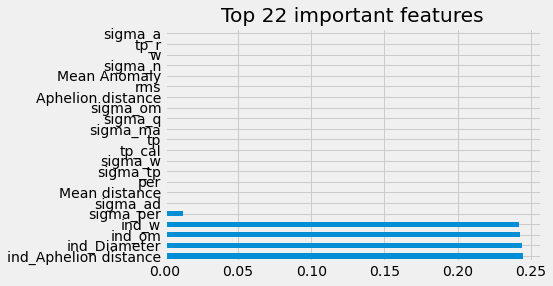

In [ ]:
feat_importances = pd.Series(xgbrf.feature_importances_, index=train.columns)
feat_importances.nlargest(22).plot(kind='barh')
plt.title("Top 22 important features")
plt.show()

## CBC

In [ ]:
from catboost import CatBoostRegressor

cbr = CatBoostRegressor()

cbr.fit(x_train,y_train,eval_set=(x_test,y_test))

preds_valid_cbr = cbr.predict(test)

print('Training Score',mean_squared_error(y_train,cbr.predict(x_train),squared=False))
print()
print('Test Score',mean_squared_error(y_test,cbr.predict(x_test),squared=False))

Learning rate set to 0.147108
0:	learn: 3353.1477171	test: 3508.5066487	best: 3508.5066487 (0)	total: 191ms	remaining: 3m 10s
1:	learn: 3026.6554165	test: 3165.6544045	best: 3165.6544045 (1)	total: 252ms	remaining: 2m 5s
2:	learn: 2764.6030469	test: 2893.9659517	best: 2893.9659517 (2)	total: 376ms	remaining: 2m 4s
3:	learn: 2555.6744255	test: 2675.3726972	best: 2675.3726972 (3)	total: 470ms	remaining: 1m 57s
4:	learn: 2390.4641674	test: 2504.3499020	best: 2504.3499020 (4)	total: 569ms	remaining: 1m 53s
5:	learn: 2258.3262586	test: 2369.0154098	best: 2369.0154098 (5)	total: 705ms	remaining: 1m 56s
6:	learn: 2154.9733196	test: 2273.0589605	best: 2273.0589605 (6)	total: 791ms	remaining: 1m 52s
7:	learn: 2074.5289915	test: 2195.4055565	best: 2195.4055565 (7)	total: 897ms	remaining: 1m 51s
8:	learn: 2009.2849791	test: 2124.8960302	best: 2124.8960302 (8)	total: 982ms	remaining: 1m 48s
9:	learn: 1954.6352450	test: 2070.5251865	best: 2070.5251865 (9)	total: 1.07s	remaining: 1m 46s
10:	learn: 1

## LGBM

In [ ]:
import lightgbm as lgb
lgr = lgb.LGBMRegressor()

lgr.fit(x_train,y_train,eval_set=[[x_train,y_train],[x_test,y_test]])

preds_valid_lgr = lgr.predict(test)

print('Training Score',mean_squared_error(y_train,lgr.predict(x_train),squared=False))
print()
print('Test Score',mean_squared_error(y_test,lgr.predict(x_test),squared=False))

[1]	training's l2: 1.19578e+07	valid_1's l2: 1.32568e+07
[2]	training's l2: 1.02647e+07	valid_1's l2: 1.15218e+07
[3]	training's l2: 8.89315e+06	valid_1's l2: 1.01289e+07
[4]	training's l2: 7.76739e+06	valid_1's l2: 8.99519e+06
[5]	training's l2: 6.84764e+06	valid_1's l2: 8.08905e+06
[6]	training's l2: 6.09351e+06	valid_1's l2: 7.35362e+06
[7]	training's l2: 5.47519e+06	valid_1's l2: 6.74858e+06
[8]	training's l2: 4.95595e+06	valid_1's l2: 6.23446e+06
[9]	training's l2: 4.53232e+06	valid_1's l2: 5.81155e+06
[10]	training's l2: 4.17092e+06	valid_1's l2: 5.50593e+06
[11]	training's l2: 3.86692e+06	valid_1's l2: 5.23476e+06
[12]	training's l2: 3.6166e+06	valid_1's l2: 5.02025e+06
[13]	training's l2: 3.40757e+06	valid_1's l2: 4.8273e+06
[14]	training's l2: 3.22577e+06	valid_1's l2: 4.68211e+06
[15]	training's l2: 3.07852e+06	valid_1's l2: 4.54613e+06
[16]	training's l2: 2.94798e+06	valid_1's l2: 4.44667e+06
[17]	training's l2: 2.83599e+06	valid_1's l2: 4.36423e+06
[18]	training's l2: 2.732

## STK

In [ ]:
from sklearn.ensemble import StackingRegressor
stk = StackingRegressor([('cbr',CatBoostRegressor()),
                        ('xgbrfr',XGBRFRegressor())])
stk.fit(x_train,y_train)

Learning rate set to 0.119084
0:	learn: 3426.5900307	total: 136ms	remaining: 2m 15s
1:	learn: 3149.4688244	total: 197ms	remaining: 1m 38s
2:	learn: 2916.2727134	total: 322ms	remaining: 1m 46s
3:	learn: 2720.8395655	total: 417ms	remaining: 1m 43s
4:	learn: 2558.4574821	total: 514ms	remaining: 1m 42s
5:	learn: 2425.5779625	total: 632ms	remaining: 1m 44s
6:	learn: 2313.1618002	total: 730ms	remaining: 1m 43s
7:	learn: 2220.2199020	total: 830ms	remaining: 1m 42s
8:	learn: 2142.3616936	total: 931ms	remaining: 1m 42s
9:	learn: 2076.5990811	total: 1.01s	remaining: 1m 40s
10:	learn: 2022.9649187	total: 1.11s	remaining: 1m 39s
11:	learn: 1978.9574910	total: 1.22s	remaining: 1m 40s
12:	learn: 1943.1307375	total: 1.32s	remaining: 1m 40s
13:	learn: 1913.2641119	total: 1.43s	remaining: 1m 40s
14:	learn: 1887.8060681	total: 1.51s	remaining: 1m 39s
15:	learn: 1866.9424977	total: 1.6s	remaining: 1m 38s
16:	learn: 1848.0824710	total: 1.7s	remaining: 1m 38s
17:	learn: 1832.3413371	total: 1.81s	remaining:

StackingRegressor(estimators=[('cbr',
                               <catboost.core.CatBoostRegressor object at 0x7fb7c25f8310>),
                              ('xgbrfr',
                               XGBRFRegressor(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              max_bin=None,
                                              ma

In [ ]:
print('Training Score',mean_squared_error(y_train,stk.predict(x_train),squared=False))
print()
print('Test Score',mean_squared_error(y_test,stk.predict(x_test),squared=False))

Training Score 1510.5034581625848

Test Score 1902.5589109654966


## SUBMISSION FILE

### Making the Final Submission File

#### Below is the code to create models on 5 subsets of data and finally averaging out their results.

In [ ]:
from sklearn.model_selection import GridSearchCV,KFold
import joblib

sgk = KFold(n_splits=5, shuffle=True, random_state=101)

preds = []
fold = 0
rmses = []

for train_idx, val_idx in sgk.split(X, y):
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]
    
    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx]
    
    stk = XGBRFRegressor()
    stk.fit(X_tr, y_tr,eval_set=[[X_tr,y_tr],[X_val,y_val]])
    
    pred = stk.predict(X_val)
    
    joblib.dump(stk, f'./stk_fold{fold}.pkl')
    rmse = mean_squared_error(y_val,pred,squared=False)

    print(f"======= Fold {fold} ========")
    print(
         f"RMSE is {rmse}"
    )
    fold += 1
    rmses.append(rmse)
oof_rmse = np.mean(rmses)
print(f'Our out of fold RMSE score is {oof_rmse}')
print()

[0]	validation_0-rmse:1554.74548	validation_1-rmse:1838.77599
======= Fold 0 ========
RMSE is 1838.7759860252347
[0]	validation_0-rmse:1516.42371	validation_1-rmse:2006.29333
======= Fold 1 ========
RMSE is 2006.293321439535
[0]	validation_0-rmse:1611.28684	validation_1-rmse:1783.31344
======= Fold 2 ========
RMSE is 1783.313422570188
[0]	validation_0-rmse:1635.23567	validation_1-rmse:1890.04612
======= Fold 3 ========
RMSE is 1890.0461086881062
[0]	validation_0-rmse:1553.20153	validation_1-rmse:1997.00434
======= Fold 4 ========
RMSE is 1997.0043342390097
Our out of fold RMSE score is 1903.0866345924146



In [ ]:
model1 = joblib.load('./stk_fold0.pkl')
model2 = joblib.load('./stk_fold1.pkl')
model3 = joblib.load('./stk_fold2.pkl')
model4 = joblib.load('./stk_fold3.pkl')
model5 = joblib.load('./stk_fold4.pkl')

preds1 = model1.predict(test)
preds2 = model2.predict(test)
preds3 = model3.predict(test)
preds4 = model4.predict(test)
preds5 = model5.predict(test)

preds = (preds1+preds2+preds3+preds4+preds5)/5

In [ ]:
df_sub['Hazard_rate'] = preds
df_sub.to_csv('ashisparida_question2.csv',index=False)
df_sub

,ID,Hazard_rate
0,0,1.258446
1,1,1.258446
2,2,1.174536
3,3,1.174536
4,4,1.174536
...,...,...
409249,409249,1.174536
409250,409250,1.174536
409251,409251,1.174536
409252,409252,1.174536
